In [2]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

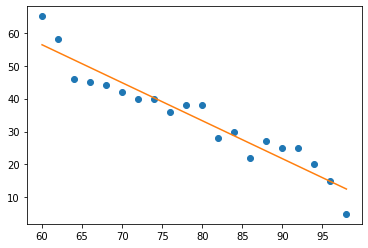

In [3]:
temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')

line_fitter = LinearRegression()
line_fitter.fit(temperature, sales)
sales_predict = line_fitter.predict(temperature)

plt.plot(temperature, sales_predict)
plt.show()

---

# __HONEY PRODUCTION PROJECT__ 

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("/Users/hiro0x/Documents/alphaprime/ai-ml-data/linear-regression/honeyproduction.csv")

print(df.head(20))

   state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0     AL   16000.0           71   1136000.0    159000.0        0.72   
1     AZ   55000.0           60   3300000.0   1485000.0        0.64   
2     AR   53000.0           65   3445000.0   1688000.0        0.59   
3     CA  450000.0           83  37350000.0  12326000.0        0.62   
4     CO   27000.0           72   1944000.0   1594000.0        0.70   
5     FL  230000.0           98  22540000.0   4508000.0        0.64   
6     GA   75000.0           56   4200000.0    307000.0        0.69   
7     HI    8000.0          118    944000.0     66000.0        0.77   
8     ID  120000.0           50   6000000.0   2220000.0        0.65   
9     IL    9000.0           71    639000.0    204000.0        1.19   
10    IN    9000.0           92    828000.0    489000.0        0.85   
11    IA   50000.0           78   3900000.0   2301000.0        0.70   
12    KS   16000.0           46    736000.0    390000.0        0.87   
13    

__EX below of using `.groupby()` method provided by pandas__

Specifically, this looks at the total production of honey per year:

In [11]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

print(prod_per_year.head())

   year     totalprod
0  1998  5.105093e+06
1  1999  4.706674e+06
2  2000  5.106000e+06
3  2001  4.221545e+06
4  2002  3.892386e+06


{INSERT LISTING OF THE VARIOUS ARGUMENTS THAT CAN BE USED OFF OF THE GROUP BY METHOD}

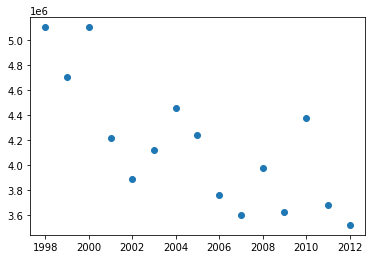

In [13]:
X = prod_per_year['year']
X = X.values.reshape(-1,1)

y = prod_per_year['totalprod']

plt.scatter(X,y)
plt.show()


-88303.18915238195


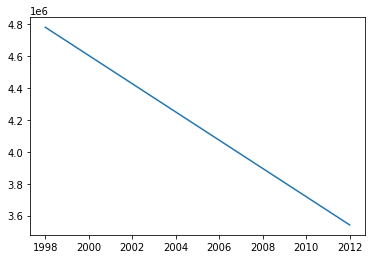

In [19]:
linear_reg = LinearRegression()

linear_reg.fit(X,y)

print(linear_reg.coef_[0])

y_predict = linear_reg.predict(X)

plt.plot(X, y_predict)
plt.show()

---

## __Training Set vs Validation Set vs Test Set__

__Supervised Machine Learning__ (vs Unsuperised classification of ML)

The training set is the data that the algorithm will learn from. Learning looks different depending on which algorithm you are using. For example, when using Linear Regression, the points in the training set are used to draw the line of best fit. In K-Nearest Neighbors, the points in the training set are the points that could be the neighbors.

After training using the training set, the points in the validation set are used to compute the accuracy or error of the classifier.

Once you’re happy with your model’s performance, it is time to introduce the test set. This is part of your data that you partitioned away at the very start of your experiment. It’s meant to be a substitute for the data in the real world that you’re actually interested in classifying. It functions very similarly to the validation set, except you never touched this data while building or tuning your model. By finding the accuracy, precision, recall, and F1 score on the test set, you get a good understanding of how well your algorithm will do in the real world.

In general, putting 80% of your data in the training set and 20% of your data in the test set is a good place to start.

---

## __MULTIPLE LINEAR REGRESSION__

__Multiple Linear Regression__ uses two or more independent variables to predict the values of the dependent variable. It is based on the following equation that we’ll explore later on:

y = b + m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n}

---

### Visualizing Results 

__residual e__ the difference between the actual value y and the predicted value ŷ { e = y - ŷ }



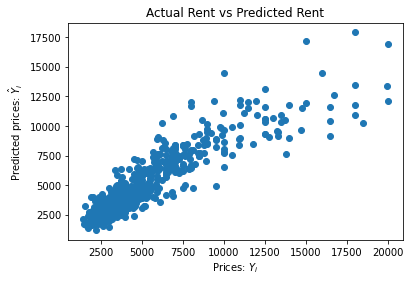

In [27]:
# new library to import 
from sklearn.model_selection import train_test_split

streeteasy = pd.read_csv("/Users/hiro0x/Documents/alphaprime/ai-ml-data/linear-regression/nyc_apts.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model=lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.scatter(y_test, y_predict)
plt.show()

# this plot will show the predicted price (y-axis) vs the price (x-axis)





Train score:
0.7725460559817883
Test score:
0.8050371975357635


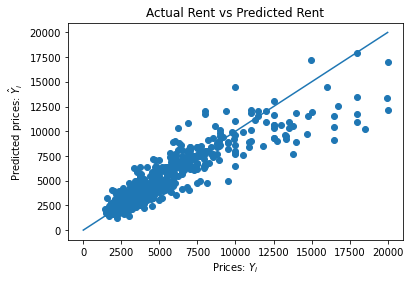

[[2592.38438399]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
# adding another library

from sklearn.metrics import mean_squared_error

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

zoe_apartment = [[1, 1, 620, 16, 1, 98, 0, 0, 1, 0, 0, 0, 1, 0]]
predict = model.predict(zoe_apartment)
print(predict)

---

## __K-Nearest Neighbors (KNN)__ 

KNN is a classification algorithm

In [35]:
# minutes of movie anf year released

star_wars = [125, 1977]
raiders = [115, 1981]
mean_girls = [97, 2004]

def distance(movie1, movie2):
  length_difference = (movie1[0] - movie2[0]) ** 2
  year_difference = (movie1[1] - movie2[1]) ** 2
  distance = (length_difference + year_difference) ** 0.5
  return distance

print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))

10.770329614269007
38.897300677553446


In [36]:
# with multiple dimensions 
# time, year, budget

star_wars = [125, 1977, 11000000]
raiders = [115, 1981, 18000000]
mean_girls = [97, 2004, 17000000]

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))

7000000.000008286
6000000.000126083


### __NORMALIZATION__ 

Normalization is the idea of normalizing the data to similar numbers, so that differences in larger numbers do not unintentionally outweigh the other parameters. 

__Min-Max Normaliztion__

(uint - min)/(max-min)

In [37]:
release_dates = [1897.0, 1998.0, 2000.0, 1948.0, 1962.0, 1950.0, 1975.0, 1960.0, 2017.0, 1937.0, 1968.0, 1996.0, 1944.0, 1891.0, 1995.0, 1948.0, 2011.0, 1965.0, 1891.0, 1978.0]

def min_max_normalize(lst):
  minimum = min(lst)
  maximum = max(lst)
  normalized = []
  
  for value in lst:
    normalized_num = (value - minimum) / (maximum - minimum)
    normalized.append(normalized_num)
  
  return normalized

print(min_max_normalize(release_dates))

[0.047619047619047616, 0.8492063492063492, 0.8650793650793651, 0.4523809523809524, 0.5634920634920635, 0.46825396825396826, 0.6666666666666666, 0.5476190476190477, 1.0, 0.36507936507936506, 0.6111111111111112, 0.8333333333333334, 0.42063492063492064, 0.0, 0.8253968253968254, 0.4523809523809524, 0.9523809523809523, 0.5873015873015873, 0.0, 0.6904761904761905]


In [ ]:
from movies import movie_dataset, labels
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(movie_dataset, labels)
guess = classifier.predict([[.45, .2, .5], [.25, .8, .9],[.1, .1, .9]])
print(guess)

### __Major Takeaways__

- Data with n features can be conceptualized as points lying in n-dimensional space.

- Data points can be compared by using the distance formula. Data points that are similar will have a smaller distance between them.

- A point with an unknown class can be classified by finding the k nearest neighbors

- To verify the effectiveness of a classifier, data with known classes can be split into a training set and a validation set. Validation error can then be calculated.

- Classifiers have parameters that can be tuned to increase their effectiveness. In the case of K-Nearest Neighbors, k can be changed.

- A classifier can be trained improperly and suffer from overfitting or underfitting. In the case of K-Nearest Neighbors, a low k often leads to overfitting and a large k often leads to underfitting.

- Python’s sklearn library can be used for many classification and machine learning algorithms.
